In [9]:
import torch
from torchaudio import transforms
import torch.nn as nn
import librosa # for mel-spectrogram estimation
import soundfile # for opening .flac audio
from matplotlib import pyplot as plt
import numpy as np

In [10]:
clean_audio, framerate = soundfile.read('explore_data/'+ 'audio_samples/' + '20-205-0000.flac')
noisy_audio, framerate = soundfile.read('explore_data/'+ 'audio_samples/' + '20-205-0000_noisy.wav')

In [11]:
clean_audio.shape
noisy_audio.shape

(189600,)

In [12]:
print(len(clean_audio) / float(framerate)) # length in seconds
print(len(noisy_audio) / float(framerate))

11.85
11.85


In [13]:
# normalized log-mel-spectrogram of clean and noisy audios
clean_mel = 1 + np.log(1.e-12 + librosa.feature.melspectrogram(clean_audio, sr=16000, n_fft=1024, hop_length=256, fmin=20, fmax=8000, n_mels=80)).T / 10.
noisy_mel = 1 + np.log(1.e-12 + librosa.feature.melspectrogram(noisy_audio, sr=16000, n_fft=1024, hop_length=256, fmin=20, fmax=8000, n_mels=80)).T / 10.

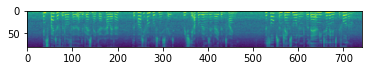

In [14]:
plt.imshow(noisy_mel.T)

In [4]:
import torch
from torchaudio import transforms
import torch.nn as nn
import librosa # for mel-spectrogram estimation
import soundfile # for opening .flac audio
from matplotlib import pyplot as plt
import numpy as np
import random

In [7]:
def use_model(path_to_flac, path_to_model):
    audio, framerate = soundfile.read(path_to_flac)
    mel = 1 + np.log(1.e-12 + librosa.feature.melspectrogram(audio, sr=16000, n_fft=1024, hop_length=256, fmin=20, fmax=8000, n_mels=80)).T / 10.
    audio_input = torch.from_numpy((mel).T)
    num_rows, sig_len = audio_input.shape
    pad_begin_len = random.randint(0, 1400 - sig_len) # 1400 длина наша максимальная, растягиваю все данные до 1400 измерений
    pad_end_len = 1400 - sig_len - pad_begin_len
    pad_begin = torch.zeros((num_rows, pad_begin_len))
    pad_end = torch.zeros((num_rows, pad_end_len))
    audio_input = torch.cat((pad_begin, audio_input, pad_end), 1)
    inputs_m, inputs_s = audio_input.mean(), audio_input.std()
    audio_input = (audio_input - inputs_m) / inputs_s
    audio_input = torch.repeat_interleave(audio_input,3,dim = 0)
    audio_input = audio_input.view(1,3,80,1400)
    best_model = torch.load(path_to_model)
    best_model.eval()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    best_model = best_model.to(device)
    audio_input = audio_input.to(device).type(torch.cuda.FloatTensor)
    out = best_model(audio_input)
    return out

In [8]:
use_model('explore_data/'+ 'audio_samples/' + '20-205-0000.flac',r'C:\Users\boris\Documents\notebok\госзнак\best_model.pth')

tensor([[ 5.9944, -5.2343]], device='cuda:0', grad_fn=<AddmmBackward0>)